In [63]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten
import matplotlib.pyplot as plt

In [64]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [65]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

In [66]:
# Scaling the data
X_train = X_train / 255.0
X_test = X_test / 255.0

In [67]:
# Building the model
model = Sequential()
# Flattening the 28x28 images into 784 element vectors, it's the input layer
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))  # Output layer for 10 classes

In [68]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [69]:
history = model.fit(X_train, y_train, epochs=20, validation_split=0.2, batch_size=20, verbose=1)

Epoch 1/20
2400/2400 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8746 - loss: 0.4348 - val_accuracy: 0.9592 - val_loss: 0.1374
Epoch 2/20
2400/2400 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9633 - loss: 0.1211 - val_accuracy: 0.9696 - val_loss: 0.1033
Epoch 3/20
2400/2400 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9755 - loss: 0.0799 - val_accuracy: 0.9714 - val_loss: 0.0981
Epoch 4/20
2400/2400 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9825 - loss: 0.0576 - val_accuracy: 0.9725 - val_loss: 0.0883
Epoch 5/20
2400/2400 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9886 - loss: 0.0396 - val_accuracy: 0.9723 - val_loss: 0.0913
Epoch 6/20
2400/2400 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9899 - loss: 0.0320 - val_accuracy: 0.9762 - val_loss: 0.0821
Epoch 7/20
2400/2400 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9931 - loss: 0.0233 - val_accuracy: 0.9766 - val_loss: 0.0822
Epoch 8/20
2400/2400 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9941 - loss: 0.0196 - 

In [70]:
# Training loss and accuracy
training_loss, training_accuracy = model.evaluate(X_train, y_train, verbose=1)
print(f'Test accuracy: {training_accuracy*100:.2f}%')
print(f'Test loss: {training_loss:.4f}')

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9984 - loss: 0.0060
Test accuracy: 99.48%
Test loss: 0.0264


In [71]:
# Test set accuracy and loss
# Evaluating the model using model.evaluate
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f'Test accuracy: {test_accuracy*100:.2f}%')
print(f'Test loss: {test_loss:.4f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9752 - loss: 0.1229
Test accuracy: 97.83%
Test loss: 0.1106


In [72]:
# Evaluating the model using accuracy_score
from sklearn.metrics import accuracy_score
# Probabilities for each class
y_pred = model.predict(X_test)
# Which class has the highest probability
y_pred_classes = y_pred.argmax(axis=1)
accuracy = accuracy_score(y_test, y_pred_classes)
print(f' Test accuracy: {accuracy*100:.2f}%')


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
 Test accuracy: 97.83%


In [73]:
# Predicting on test data
print(f'Predicted classes: {y_pred[:1]}') # Probabilities for each class (0-9) for the first test sample.
print(f'Predicted class labels: {y_pred_classes[:1]}') # Predicted class label for the first test sample on the basis of highest probability.

Predicted classes: [[3.86338720e-13 1.10978197e-16 1.63507444e-10 2.89328597e-08
  1.87928347e-21 1.73738977e-14 1.72791224e-21 9.99999881e-01
  1.43929434e-11 1.63978214e-07]]
Predicted class labels: [7]


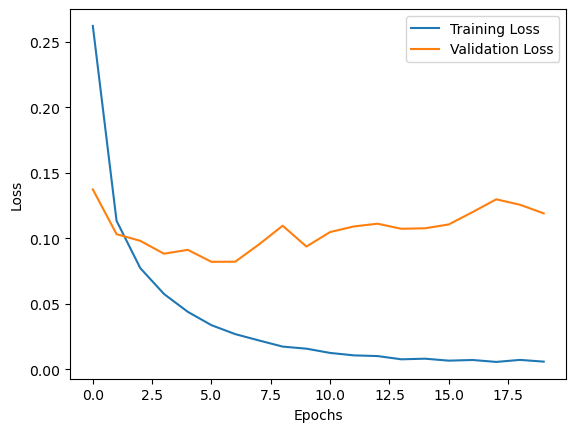

In [74]:
# Loss plot
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss') 
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

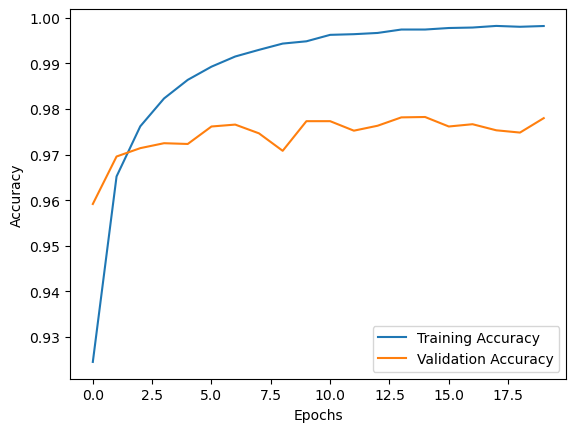

In [75]:
# Accuracy plot
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


array([7], dtype=int64)

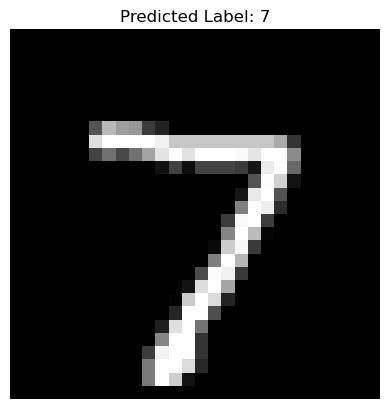

In [76]:
# Predicting on test data
plt.imshow(X_test[0], cmap='gray')
plt.title(f'Predicted Label: {y_pred_classes[0]}')
plt.axis('off')
model.predict(X_test[0].reshape(1, 28, 28)).argmax(axis=1)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


array([9], dtype=int64)

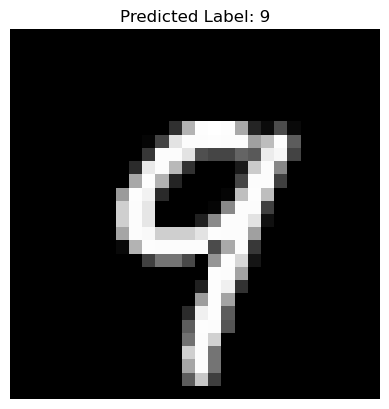

In [77]:
plt.imshow(X_test[12], cmap='gray')
plt.title(f'Predicted Label: {y_pred_classes[12]}')
plt.axis('off')
model.predict(X_test[12].reshape(1, 28, 28)).argmax(axis=1)